# **Importando, lendo e transformando os dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Lendo arquivo .csv dos microdados disponível em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem e em seguida verifiquei o dataframe e quantidade de linhas e colunas.
base = pd.read_csv('/content/drive/MyDrive/Dados/MICRODADOS_ENEM_2022.csv', sep= ';', encoding='iso-8859-1')
display(base.head(5))
print(base.shape)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


(3476105, 76)


In [3]:
# Vericando todas as colunas do dataframe para separar as colunas que me interessam para a análise.
base.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [4]:
# Separando as colunas para análise em uma variável chamada de 'colunasSelecionadas', trazendo especialmente a coluna Q006 ('Renda mensal familiar') e coluna Q025('Possui Acesso a internet em casa').
colunasSelecionadas = ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ESCOLA','NO_MUNICIPIO_PROVA',
       'IN_TREINEIRO','SG_UF_PROVA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','Q006','Q025']

In [5]:
# Filtrando o dataframe apenas com as colunas interessadas.
baseReduzidaEnem = base.filter(items = colunasSelecionadas)

In [6]:
# Verificando o Filtro no novo dataframe 'baseReduzidaEnem' para manipulação mais rápida dos dados com 16 colunas.
display(baseReduzidaEnem.head(5))
print(baseReduzidaEnem.shape)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NO_MUNICIPIO_PROVA,IN_TREINEIRO,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025
0,210057943671,14,M,2,1,1,Brasília,0,DF,NaN,NaN,NaN,NaN,NaN,B,A
1,210057516120,14,M,1,1,1,Brasília,0,DF,NaN,NaN,NaN,NaN,NaN,Q,B
2,210057280536,5,F,2,1,1,Presidente Tancredo Neves,0,BA,421.1,546.0,498.8,565.3,760.0,B,B
3,210055724397,6,M,3,1,1,Cariacica,0,ES,490.7,388.6,357.8,416.0,320.0,A,B
4,210055097896,4,M,3,1,1,Salinópolis,0,PA,NaN,NaN,NaN,NaN,NaN,B,A


(3476105, 16)


## **Tratando valores nulos**

In [7]:
# Verificando Valores Nulos nas colunas.
baseReduzidaEnem.isnull().sum()

NU_INSCRICAO                0
TP_FAIXA_ETARIA             0
TP_SEXO                     0
TP_COR_RACA                 0
TP_NACIONALIDADE            0
TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
IN_TREINEIRO                0
SG_UF_PROVA                 0
NU_NOTA_CN            1120710
NU_NOTA_CH             982663
NU_NOTA_LC             982663
NU_NOTA_MT            1120710
NU_NOTA_REDACAO        982663
Q006                        0
Q025                        0
dtype: int64

In [8]:
# Removendo valores nulos de notas para melhor vizualização de desempenho dos candidatos.
baseReduzidaEnem.dropna(subset= ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], inplace= True)
baseReduzidaEnem.isnull().sum()

NU_INSCRICAO          0
TP_FAIXA_ETARIA       0
TP_SEXO               0
TP_COR_RACA           0
TP_NACIONALIDADE      0
TP_ESCOLA             0
NO_MUNICIPIO_PROVA    0
IN_TREINEIRO          0
SG_UF_PROVA           0
NU_NOTA_CN            0
NU_NOTA_CH            0
NU_NOTA_LC            0
NU_NOTA_MT            0
NU_NOTA_REDACAO       0
Q006                  0
Q025                  0
dtype: int64

## **Transformando colunas e registros conforme o dicionário disponibilizado pelo governo federal.**

In [9]:
# Coluna TP_FAIXA_ETARIA
baseReduzidaEnem.rename(columns= {'TP_FAIXA_ETARIA': 'Faixa Etaria'}, inplace= True)
baseReduzidaEnem['Faixa Etaria'] = baseReduzidaEnem['Faixa Etaria'].map({1: 'Menor de 17 anos',
                                                           2: '17 anos',
                                                           3 : '18 anos',
                                                           4: '19 anos',
                                                           5 : '20 anos',
                                                           6 :'21 anos',
                                                           7 : '22 anos',
                                                           8 : '23 anos',
                                                           9 : '24 anos',
                                                           10 :'25 anos',
                                                           11 : 'Entre 26 e 30 anos',
                                                           12 : 'Entre 31 e 35 anos',
                                                           13 : 'Entre 36 e 40 anos',
                                                           14 : 'Entre 41 e 45 anos',
                                                           15 : 'Entre 46 e 50 anos',
                                                           16 : 'Entre 51 e 55 anos',
                                                           17 : 'Entre 56 e 60 anos',
                                                           18 : 'Entre 61 e 65 anos',
                                                           19 : 'Entre 66 e 70 anos',
                                                           20 : 'Acima de 70 anos'})

In [10]:
# Coluna TP_SEXO
baseReduzidaEnem.rename(columns= {'TP_SEXO': 'Sexo'}, inplace= True)
baseReduzidaEnem['Sexo'] = baseReduzidaEnem['Sexo'].map({'F': 'Feminino', 'M': 'Masculino'})

In [11]:
# Coluna TP_COR_RACA.
baseReduzidaEnem.rename(columns= {'TP_COR_RACA': 'Cor/raça'}, inplace= True)
baseReduzidaEnem['Cor/raça'] = baseReduzidaEnem['Cor/raça'].map({ 0 : 'Não declarado', 1: 'Branca',
                                                                  2 : 'Preta' , 3 :'Parda',
                                                                  4 : 'Amarela', 5 :'Indígena',
                                                                  6 : 'Não dispõe da informação'})

In [12]:
# Coluna TP_NACIONALIDADE
baseReduzidaEnem.rename(columns= {'TP_NACIONALIDADE': 'Nacionalidade'}, inplace= True)
baseReduzidaEnem['Nacionalidade'] = baseReduzidaEnem['Nacionalidade'].map({ 0 : 'Não Informado', 1: 'Brasileiro(a)',
                                                                            2 : 'Brasileiro(a) Naturalizado(a)' , 3 :'Estrangeiro(a)',
                                                                            4 : 'Brasileiro(a) Nato(a), nascido(a) no exterior'})

In [13]:
# Coluna TP_ESCOLA
baseReduzidaEnem.rename(columns= {'TP_ESCOLA': 'Tipo de escola do Ensino Médio'}, inplace= True)
baseReduzidaEnem['Tipo de escola do Ensino Médio'] = baseReduzidaEnem['Tipo de escola do Ensino Médio'].map({1: 'Não Respondeu', 2: 'Pública', 3 : 'Privada'})


In [14]:
# Coluna SG_UF_PROVA
baseReduzidaEnem.rename(columns= {'SG_UF_PROVA': 'Estado'}, inplace= True)

In [15]:
# Coluna NO_MUNICIPIO_PROVA
baseReduzidaEnem.rename(columns= {'NO_MUNICIPIO_PROVA': 'Município'}, inplace= True)

In [16]:
# Coluna IN_TREINEIRO
baseReduzidaEnem.rename(columns= {'IN_TREINEIRO': 'Treineiro'}, inplace= True)
baseReduzidaEnem['Treineiro'] = baseReduzidaEnem['Treineiro'].map({0 : 'Não', 1 : 'Sim'})

In [17]:
# Coluna Q006 (Renda mensal familiar)
baseReduzidaEnem.rename(columns= {'Q006': 'Renda Mensal Familiar'}, inplace= True)
baseReduzidaEnem['Renda Mensal Familiar'] = baseReduzidaEnem['Renda Mensal Familiar'].map({ "A": "Nenhuma Renda",
                                                                                            "B": "Até R$ 1.212,00",
                                                                                            "C": "De R$ 1.212,01 até R$ 1.818,00",
                                                                                            "D": "De R$ 1.818,01 até R$ 2.424,00",
                                                                                            "E": "De R$ 2.424,01 até R$ 3.030,00",
                                                                                            "F": "De R$ 3.030,01 até R$ 3.636,00",
                                                                                            "G": "De R$ 3.636,01 até R$ 4.848,00",
                                                                                            "H": "De R$ 4.848,01 até R$ 6.060,00",
                                                                                            "I": "De R$ 6.060,01 até R$ 7.272,00",
                                                                                            "J": "De R$ 7.272,01 até R$ 8.484,00",
                                                                                            "K": "De R$ 8.484,01 até R$ 9.696,00",
                                                                                            "L": "De R$ 9.696,01 até R$ 10.908,00",
                                                                                            "M": "De R$ 10.908,01 até R$ 12.120,00",
                                                                                            "N": "De R$ 12.120,01 até R$ 14.544,00",
                                                                                            "O": "De R$ 14.544,01 até R$ 18.180,00",
                                                                                            "P": "De R$ 18.180,01 até R$ 24.240,00",
                                                                                            "Q": "Acima de R$ 24.240,00"})

In [18]:
# Coluna Q025.
baseReduzidaEnem.rename(columns= {'Q025': 'Acesso a Internet'}, inplace= True)
baseReduzidaEnem['Acesso a Internet'] = baseReduzidaEnem['Acesso a Internet'].map({'A' : 'Não', 'B' : 'Sim'})

In [19]:
# Adicionando a Coluna 'Nota de Desempenho' ao dataframe sendo a média dos registros de todas as notas para melhor vizualização do desempenho de cada candidato.
baseReduzidaEnem['Nota de Desempenho'] = baseReduzidaEnem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)

In [20]:
baseReduzidaEnem.head()

,NU_INSCRICAO,Faixa Etaria,Sexo,Cor/raça,Nacionalidade,Tipo de escola do Ensino Médio,Município,Treineiro,Estado,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Renda Mensal Familiar,Acesso a Internet,Nota de Desempenho
2,210057280536,20 anos,Feminino,Preta,Brasileiro(a),Não Respondeu,Presidente Tancredo Neves,Não,BA,421.1,546.0,498.8,565.3,760.0,"Até R$ 1.212,00",Sim,558.24
3,210055724397,21 anos,Masculino,Parda,Brasileiro(a),Não Respondeu,Cariacica,Não,ES,490.7,388.6,357.8,416.0,320.0,Nenhuma Renda,Sim,394.62
7,210055778089,21 anos,Feminino,Preta,Brasileiro(a),Não Respondeu,São Gonçalo,Não,RJ,398.1,427.3,400.2,404.9,440.0,"Até R$ 1.212,00",Sim,414.10
9,210055461467,19 anos,Feminino,Parda,Brasileiro(a),Não Respondeu,Arcoverde,Não,PE,467.5,461.0,466.7,435.3,360.0,"Até R$ 1.212,00",Sim,438.10
11,210054972570,17 anos,Feminino,Branca,Brasileiro(a),Privada,Nossa Senhora da Glória,Não,SE,458.7,539.8,488.2,456.8,940.0,"Até R$ 1.212,00",Sim,576.70


# **Análise geral do dataframe dos dados no Brasil.**

In [21]:
# Verificando a quantidade de candidatos por estado
baseReduzidaEnem['Estado'].value_counts()

Estado
SP    373252
MG    214443
BA    183110
RJ    168854
CE    156387
PA    134445
PE    130361
RS    101872
PR    100046
MA     90133
GO     89852
PB     72724
RN     62017
PI     60310
SC     55896
DF     44572
AL     43425
ES     42367
SE     42037
AM     41219
MT     37299
MS     28121
RO     19583
TO     19076
AC     14280
AP     14252
RR      4890
Name: count, dtype: int64

In [22]:
# Calculando porcentagem de candidatos treineiros e não treineiros utilizando list Comprehension.
baseTreineiro = baseReduzidaEnem['Treineiro'].value_counts()
porcentagemTreineiro = [100 * x/baseTreineiro.sum() for x in baseTreineiro]
porcentagemTreineiro

[82.21315638749705, 17.78684361250295]

<Axes: xlabel='Faixa Etaria'>

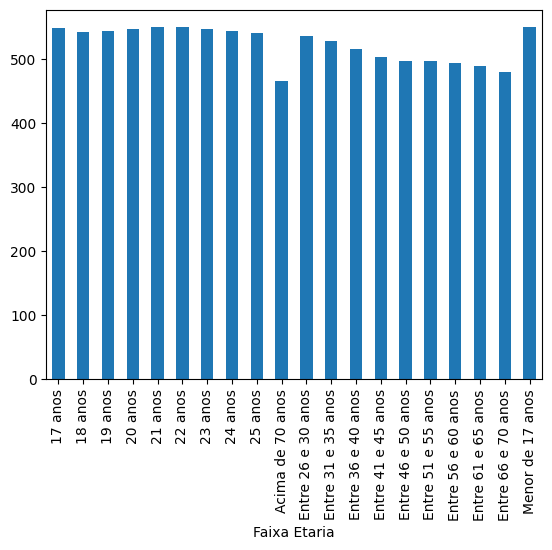

In [23]:
# vizualizando média de desempenho por faixa etaria.
baseReduzidaEnem.groupby('Faixa Etaria')['Nota de Desempenho'].mean().plot.bar()

# **Análise geral para o estado do Ceará**


In [24]:
# Reduzindo a base de dados para analisar mais especificamente dentro do estado do ceará.
baseCeara = baseReduzidaEnem.loc[baseReduzidaEnem['Estado'] == 'CE']
baseCeara.head()

,NU_INSCRICAO,Faixa Etaria,Sexo,Cor/raça,Nacionalidade,Tipo de escola do Ensino Médio,Município,Treineiro,Estado,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Renda Mensal Familiar,Acesso a Internet,Nota de Desempenho
23,210057706656,19 anos,Masculino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,476.0,559.2,607.3,625.4,760.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,605.58
40,210056717205,20 anos,Feminino,Parda,Brasileiro(a),Pública,Aracati,Não,CE,436.7,420.0,512.6,430.4,560.0,"Até R$ 1.212,00",Sim,471.94
60,210054659789,17 anos,Feminino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Sim,CE,458.9,462.8,458.9,506.2,660.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,509.36
93,210057278590,19 anos,Feminino,Parda,Brasileiro(a),Não Respondeu,Aracati,Não,CE,471.2,560.8,557.8,582.4,660.0,"De R$ 1.818,01 até R$ 2.424,00",Sim,566.44
105,210056159910,24 anos,Feminino,Parda,Brasileiro(a) Naturalizado(a),Não Respondeu,Fortaleza,Não,CE,399.7,479.3,511.2,398.9,360.0,"Até R$ 1.212,00",Não,429.82


In [25]:
# Analisando a faixa etaria dos candidatos no Ceará
baseCeara['Faixa Etaria'].value_counts().sort_index()

Faixa Etaria
17 anos               42283
18 anos               45104
19 anos               17045
20 anos                8984
21 anos                5135
22 anos                3494
23 anos                2542
24 anos                1840
25 anos                1571
Acima de 70 anos         17
Entre 26 e 30 anos     4701
Entre 31 e 35 anos     2510
Entre 36 e 40 anos     1779
Entre 41 e 45 anos     1122
Entre 46 e 50 anos      660
Entre 51 e 55 anos      419
Entre 56 e 60 anos      256
Entre 61 e 65 anos       87
Entre 66 e 70 anos       35
Menor de 17 anos      16803
Name: count, dtype: int64

[56.791804945423856, 43.208195054576144]

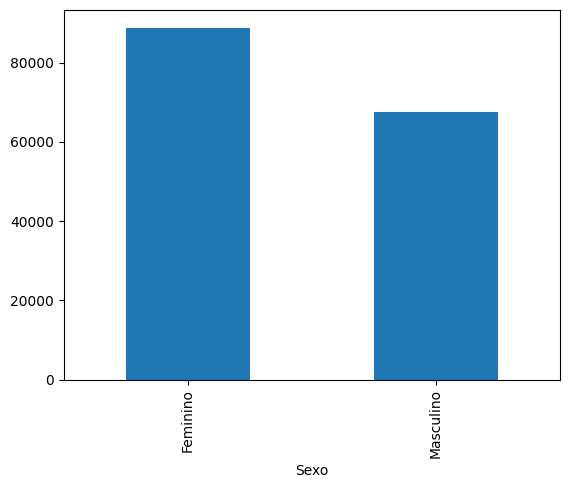

In [26]:
# Vizualizando a relação entre sexo dos candidatos e sua porcentagem através de list comprehension
baseCeara['Sexo'].value_counts().plot.bar()

baseSexo = baseCeara['Sexo'].value_counts()
porcentagemSexo = [100 * x/baseSexo.sum() for x in baseSexo]
porcentagemSexo

<Axes: xlabel='Tipo de escola do Ensino Médio'>

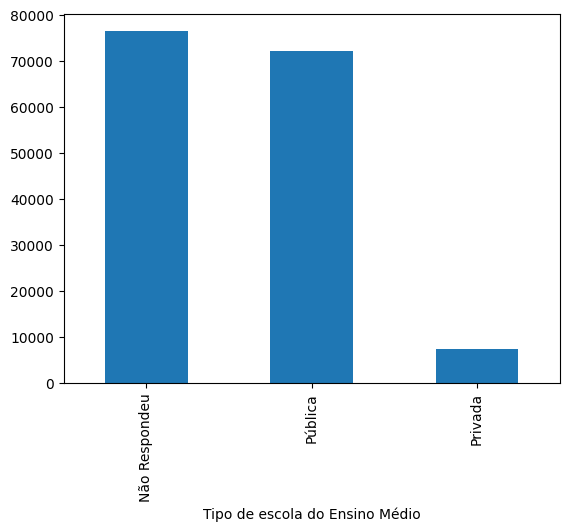

In [27]:
# Vizualizando graficamente a relação com tipo de escola no ensino médio.
baseCeara['Tipo de escola do Ensino Médio'].value_counts().plot.bar()

In [28]:
# Analisando quantidade de candidatos por municipio.
baseCeara['Município'].value_counts()

Município
Fortaleza            48064
Juazeiro do Norte     6214
Sobral                4938
Caucaia               4639
Maracanaú             3071
                     ...  
Mulungu                260
Madalena               254
Banabuiú               230
Jaguaretama            200
Santana do Cariri      175
Name: count, Length: 119, dtype: int64

In [29]:
# Verificando renda mensal familiar dos candidatos
baseCeara['Renda Mensal Familiar'].value_counts()

Renda Mensal Familiar
Até R$ 1.212,00                     75525
De R$ 1.212,01 até R$ 1.818,00      24609
De R$ 1.818,01 até R$ 2.424,00      13620
Nenhuma Renda                       12115
De R$ 2.424,01 até R$ 3.030,00       7363
De R$ 3.636,01 até R$ 4.848,00       4557
De R$ 4.848,01 até R$ 6.060,00       4442
De R$ 3.030,01 até R$ 3.636,00       3922
De R$ 6.060,01 até R$ 7.272,00       1816
De R$ 7.272,01 até R$ 8.484,00       1229
De R$ 9.696,01 até R$ 10.908,00      1198
Acima de R$ 24.240,00                1179
De R$ 10.908,01 até R$ 12.120,00     1178
De R$ 18.180,01 até R$ 24.240,00      946
De R$ 8.484,01 até R$ 9.696,00        911
De R$ 14.544,01 até R$ 18.180,00      897
De R$ 12.120,01 até R$ 14.544,00      880
Name: count, dtype: int64

[86.5788077014074, 13.421192298592594]


<Axes: xlabel='Acesso a Internet'>

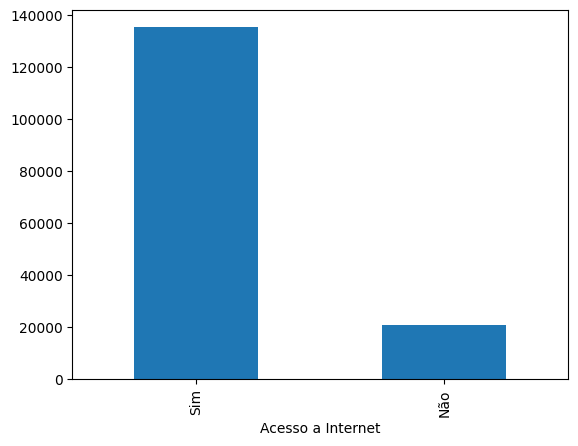

In [30]:
# Vizualizando graficamente se há acesso a internet em casa dos candidatos e sua porcentagem
baseAcessoInternet = baseCeara['Acesso a Internet'].value_counts()
porcentagemAcessoInternet = [100 * x/baseAcessoInternet.sum() for x in baseAcessoInternet]
print(porcentagemAcessoInternet)

baseCeara['Acesso a Internet'].value_counts().plot.bar()

<Axes: xlabel='Faixa Etaria'>

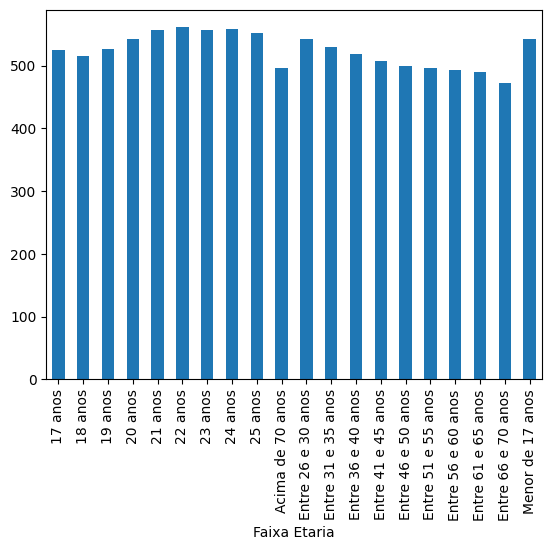

In [31]:
# Verificando a relação de desempenho e faixa etária dos candidatos.
baseCeara.groupby('Faixa Etaria')['Nota de Desempenho'].mean().plot.bar()

# **Análise geral dentro da capital Fortaleza**

In [32]:
# Reduzindo a base de dados para registros somente dentro da capital Fortaleza
baseFortaleza = baseReduzidaEnem.loc[baseReduzidaEnem['Município'] == 'Fortaleza']
baseFortaleza.head()

,NU_INSCRICAO,Faixa Etaria,Sexo,Cor/raça,Nacionalidade,Tipo de escola do Ensino Médio,Município,Treineiro,Estado,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Renda Mensal Familiar,Acesso a Internet,Nota de Desempenho
23,210057706656,19 anos,Masculino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,476.0,559.2,607.3,625.4,760.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,605.58
60,210054659789,17 anos,Feminino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Sim,CE,458.9,462.8,458.9,506.2,660.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,509.36
105,210056159910,24 anos,Feminino,Parda,Brasileiro(a) Naturalizado(a),Não Respondeu,Fortaleza,Não,CE,399.7,479.3,511.2,398.9,360.0,"Até R$ 1.212,00",Não,429.82
138,210056149883,23 anos,Feminino,Branca,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,637.8,631.0,598.5,807.7,860.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,707.00
223,210054981491,Entre 26 e 30 anos,Masculino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,570.4,501.7,576.4,671.0,680.0,"Até R$ 1.212,00",Sim,599.90


In [33]:
# Verificando quantidade de candidatos por faixa etária
baseFortaleza['Faixa Etaria'].value_counts().sort_index()

Faixa Etaria
17 anos               11351
18 anos               12403
19 anos                6013
20 anos                3142
21 anos                1794
22 anos                1303
23 anos                 937
24 anos                 710
25 anos                 590
Acima de 70 anos          8
Entre 26 e 30 anos     1852
Entre 31 e 35 anos     1076
Entre 36 e 40 anos      778
Entre 41 e 45 anos      588
Entre 46 e 50 anos      391
Entre 51 e 55 anos      267
Entre 56 e 60 anos      168
Entre 61 e 65 anos       64
Entre 66 e 70 anos       25
Menor de 17 anos       4604
Name: count, dtype: int64

<Axes: xlabel='Cor/raça', ylabel='count'>

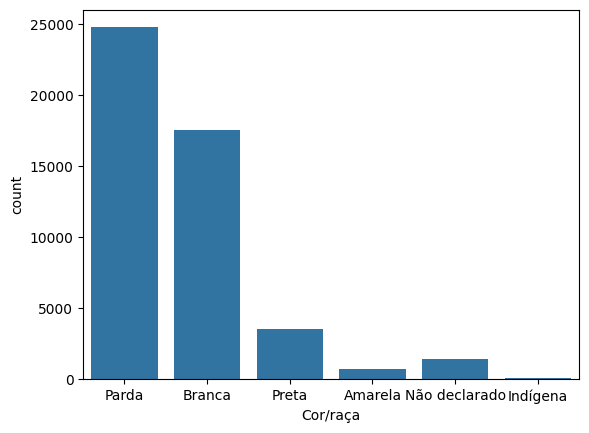

In [34]:
# Criando gráfico de cor/raça entre candidatos
sns.countplot(x='Cor/raça', data=baseFortaleza)

In [35]:
# vizualizando nacionalidade de candidatos.
baseFortaleza['Nacionalidade'].value_counts()

Nacionalidade
Brasileiro(a)                                    47329
Brasileiro(a) Naturalizado(a)                      635
Brasileiro(a) Nato(a), nascido(a) no exterior       54
Estrangeiro(a)                                      31
Não Informado                                       15
Name: count, dtype: int64

<Axes: xlabel='Tipo de escola do Ensino Médio'>

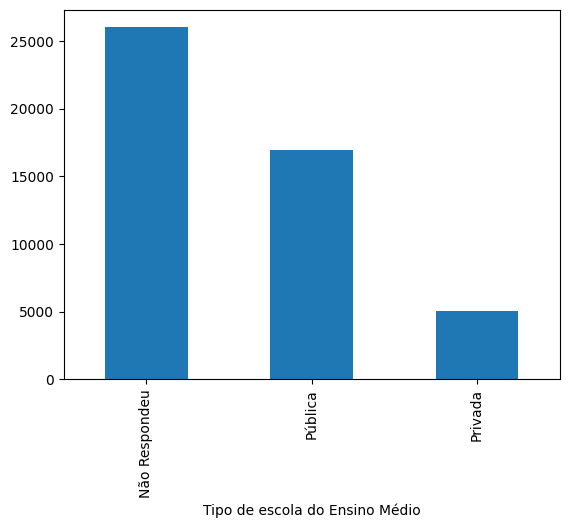

In [36]:
# Vizualizando o tipo de escola dos candidatos.
baseFortaleza['Tipo de escola do Ensino Médio'].value_counts().plot.bar()


<Axes: xlabel='Renda Mensal Familiar'>

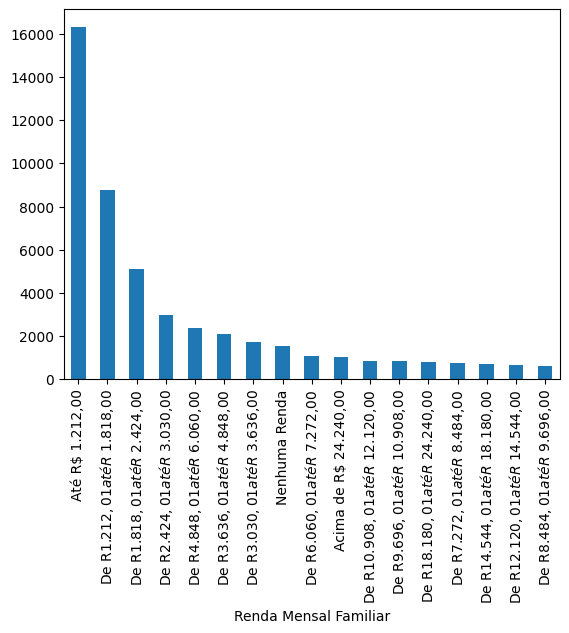

In [56]:
# analisando a quantidade de candidatos por renda familiar
baseFortaleza['Renda Mensal Familiar'].value_counts().plot.bar()

# **Análises específicas de candidatos em Fortaleza - CE**

## **Análises de Perfil**

In [85]:
baseFortaleza.head()

,NU_INSCRICAO,Faixa Etaria,Sexo,Cor/raça,Nacionalidade,Tipo de escola do Ensino Médio,Município,Treineiro,Estado,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Renda Mensal Familiar,Acesso a Internet,Nota de Desempenho
23,210057706656,19 anos,Masculino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,476.0,559.2,607.3,625.4,760.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,605.58
60,210054659789,17 anos,Feminino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Sim,CE,458.9,462.8,458.9,506.2,660.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,509.36
105,210056159910,24 anos,Feminino,Parda,Brasileiro(a) Naturalizado(a),Não Respondeu,Fortaleza,Não,CE,399.7,479.3,511.2,398.9,360.0,"Até R$ 1.212,00",Não,429.82
138,210056149883,23 anos,Feminino,Branca,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,637.8,631.0,598.5,807.7,860.0,"De R$ 2.424,01 até R$ 3.030,00",Sim,707.00
223,210054981491,Entre 26 e 30 anos,Masculino,Parda,Brasileiro(a),Não Respondeu,Fortaleza,Não,CE,570.4,501.7,576.4,671.0,680.0,"Até R$ 1.212,00",Sim,599.90


In [99]:
# Verificando faixa etária de candidatos em fortaleza
baseFortaleza['Faixa Etaria'].value_counts().sort_index()

Faixa Etaria
17 anos               11351
18 anos               12403
19 anos                6013
20 anos                3142
21 anos                1794
22 anos                1303
23 anos                 937
24 anos                 710
25 anos                 590
Acima de 70 anos          8
Entre 26 e 30 anos     1852
Entre 31 e 35 anos     1076
Entre 36 e 40 anos      778
Entre 41 e 45 anos      588
Entre 46 e 50 anos      391
Entre 51 e 55 anos      267
Entre 56 e 60 anos      168
Entre 61 e 65 anos       64
Entre 66 e 70 anos       25
Menor de 17 anos       4604
Name: count, dtype: int64

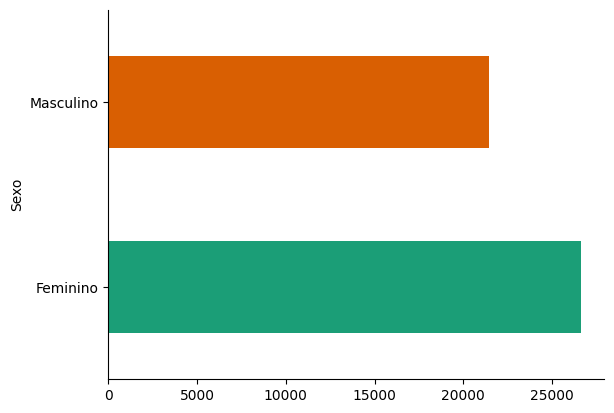

In [98]:
# @title Sexo
baseFortaleza.groupby('Sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

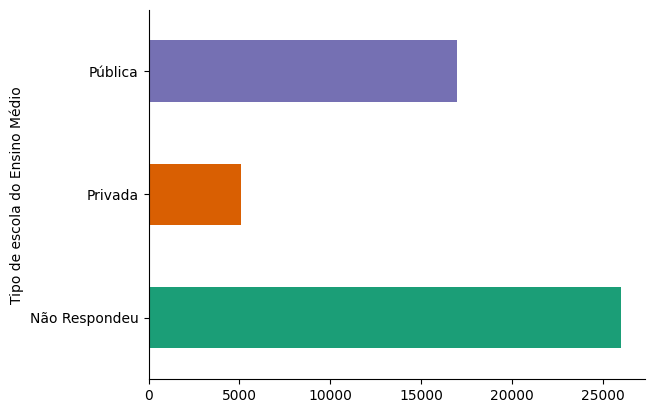

In [97]:
# @title Tipo de escola do Ensino Médio

baseFortaleza.groupby('Tipo de escola do Ensino Médio').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

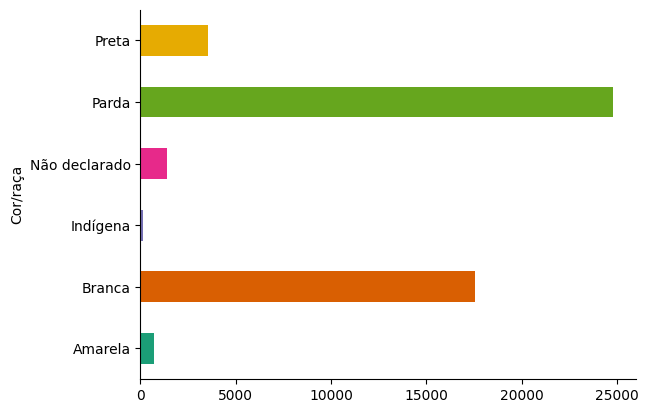

In [96]:
# @title Cor/raça
baseFortaleza.groupby('Cor/raça').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Análise específica de candidatos com e sem acesso a internet em casa**

In [52]:
# analisando a  relação entre a nota de desempenho e o acesso a internet pela média de nota dos candidatos com acesso a internet e a média da nota dos candidatos sem acesso a internet
baseAcesso = round(baseFortaleza.loc[baseFortaleza['Acesso a Internet'] == 'Sim']['Nota de Desempenho'].mean(), 2)
baseNaoAcesso = round(baseFortaleza.loc[baseFortaleza['Acesso a Internet'] == 'Não']['Nota de Desempenho'].mean(), 2)

# Analizando a nota de desempenho máxima de cada segmento
baseAcessomax = baseFortaleza.loc[baseFortaleza['Acesso a Internet'] == 'Sim']['Nota de Desempenho'].max()
baseNaoAcessomax = baseFortaleza.loc[baseFortaleza['Acesso a Internet'] == 'Não']['Nota de Desempenho'].max()

print(f'Nota de desempenho máxima dos candidatos com acesso a internet: {baseAcessomax}')
print(f'Nota de desempenho máxima dos candidatos sem acesso a internet: {baseNaoAcessomax}')

print(f'Média de nota dos candidatos com acesso a internet: {baseAcesso}')
print(f'Média de nota dos candidatos sem acesso a internet: {baseNaoAcesso}')

Nota de desempenho máxima dos candidatos com acesso a internet: 830.18
Nota de desempenho máxima dos candidatos sem acesso a internet: 783.26
Média de nota dos candidatos com acesso a internet: 564.13
Média de nota dos candidatos sem acesso a internet: 487.18


## **Analises de desempenho a partir da renda familiar**

In [60]:
# Analisando a relação entre a nota de desempenho e a renda familiar pela média das notas
baseFortaleza.groupby('Renda Mensal Familiar')['Nota de Desempenho'].mean()

Renda Mensal Familiar
Acima de R$ 24.240,00               657.726077
Até R$ 1.212,00                     511.446175
De R$ 1.212,01 até R$ 1.818,00      535.157731
De R$ 1.818,01 até R$ 2.424,00      561.600456
De R$ 10.908,01 até R$ 12.120,00    640.134296
De R$ 12.120,01 até R$ 14.544,00    648.031735
De R$ 14.544,01 até R$ 18.180,00    644.989733
De R$ 18.180,01 até R$ 24.240,00    652.798711
De R$ 2.424,01 até R$ 3.030,00      578.789388
De R$ 3.030,01 até R$ 3.636,00      594.115719
De R$ 3.636,01 até R$ 4.848,00      607.943369
De R$ 4.848,01 até R$ 6.060,00      614.007730
De R$ 6.060,01 até R$ 7.272,00      625.353265
De R$ 7.272,01 até R$ 8.484,00      628.059180
De R$ 8.484,01 até R$ 9.696,00      634.612823
De R$ 9.696,01 até R$ 10.908,00     639.258825
Nenhuma Renda                       501.330465
Name: Nota de Desempenho, dtype: float64

In [73]:
# Buscando a renda mensal familiar com maior quantidade de candidatos e colocando numa variavel
rendaModa = baseFortaleza['Renda Mensal Familiar'].value_counts().max()
rendaModa

16325

In [77]:
# Buscando a quantidade de candidaatos com renda familiar maior (renda acima de R$ 24.240,00), sem Nenhuma Renda e de renda com maior número de candidatos
qtdeRendazero = baseFortaleza.loc[baseFortaleza['Renda Mensal Familiar'] == 'Nenhuma Renda', 'Renda Mensal Familiar'].count()
qtdeRendamaior = baseFortaleza.loc[baseFortaleza['Renda Mensal Familiar'] == 'Acima de R$ 24.240,00', 'Renda Mensal Familiar'].count()
print(f'Quantidade de candidatos com renda menor (Nenhuma Renda): {qtdeRendazero}')
print(f'Quantidade de candidatos com renda maior (Acima de R$ 24.240,00): {qtdeRendamaior}')
print(f'Quantidade de candidatos com renda com maior distribuição (Até R$ 1.212,00): {rendaModa}')

Quantidade de candidatos com renda menor (Nenhuma Renda): 1550
Quantidade de candidatos com renda maior (Acima de R$ 24.240,00): 1007
Quantidade de candidatos com renda com maior distribuição (Até R$ 1.212,00): 16325


## **Análise de desempenho por tipo de escola**

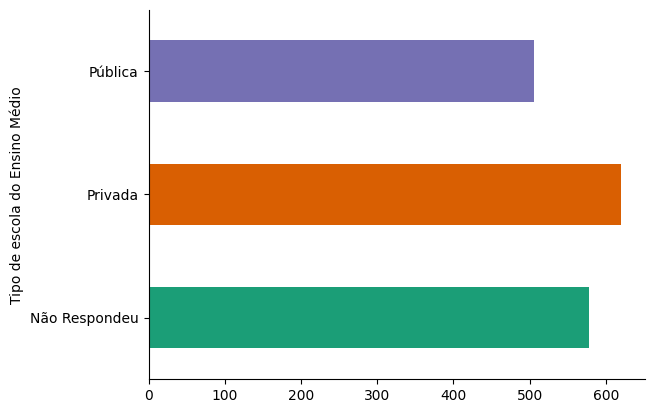

In [102]:
# analisando o desempenho pela nota geral e o tipo de escola
baseFortaleza.groupby('Tipo de escola do Ensino Médio')['Nota de Desempenho'].mean().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)